In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import *

### cleaning

In [2]:
df_p = pd.read_csv('data/custom_ppds_output_2023-01-31.csv')
df_p

,slot,block_hash,block_reward,gas_used,validator_pubkey,operator_name,pool_name,buidler_pubkey,buidler_name,relay_name,relay_url
0,4700567,0x7d57a1d26f71724737f5dc780ca2dfb778c2fc5be29b...,0.283204,27657346,0xa606aca2180226fc69e0652134eca4c7f4a428585c11...,NaN,NaN,0xa1dead01e65f0a0eee7b5170223f20c8f0cbf122eac3...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
1,4700575,0xc923337f63a0ed51288b1468064085679383d41ebee7...,0.845802,27535785,0x9489e9354f515580f6a949f69eed311eeb26b268b744...,NaN,NaN,0xa1dead01e65f0a0eee7b5170223f20c8f0cbf122eac3...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
2,4700606,0x804f376a4e15f62a75f26828b8866a0db1cfb2bf9235...,0.213524,24830670,0x82d5ebc6c3ef5eda41dcbb1cbdfd5863ab6e4d16b137...,CryptoManufaktur,StakeWise,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
3,4700694,0x4ac8e0a2c04382ed4cdafd44e8f45b77a071a5974d78...,0.113136,23574818,0x8e7d5eed0f72cd56e547e2fabea19a65668577fd2d64...,NaN,NaN,0xa1dead01e65f0a0eee7b5170223f20c8f0cbf122eac3...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
4,4700724,0x43a4d4a888f1d2626a4c18f13ed0701f057606396a40...,0.637987,22578328,0xae1426c22c5c0d91d62c5a224759f44569a0a52e6cb8...,NaN,Rocketpool,0xa1dead01e65f0a0eee7b5170223f20c8f0cbf122eac3...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
...,...,...,...,...,...,...,...,...,...,...,...
749164,5694474,0x5d7275cf6b1416187f01863863f436534a532a22b874...,0.041200,16462587,0x93a7627c19128e53e502bb1695216d43c107e6b0d735...,Staked.us,NaN,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Ultra Sound Relay,https://0xa1559ace749633b997cb3fdacffb890aeebd...
749165,5694475,0x14bce20a9a0da7882585e8f9a76a97a04eec7f28f37b...,0.020666,12956177,0x81f9ce11de952c4cfcc3b9ad46dae61aa29a388e7050...,NaN,Celsius Network,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...
749166,5694476,0xde34a2c9b4e25b0b704fc73dd27978968af150cc71c9...,0.021962,12312887,0x8146d34e1eeb71636a55db301149f9221f454d844d66...,Staked.us,NaN,0x8000008a03ebae7d8ab2f66659bd719a698b2e74097d...,blocknative,Blocknative,https://0x9000009807ed12c1f08bf4e81c6da3ba8e3f...
749167,5694477,0xd1528589d94f505694481e41eeff54905e1e43d9f688...,0.019041,13282800,0x99fdae8f44eec993f4b907b9d53a6a9a75209dd98076...,NaN,NaN,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots,https://0xac6e77dfe25ecd6110b8e780608cce0dab71...


In [3]:
df_p.sort_values(by='slot', ascending=True, inplace=True)

In [4]:
df_p.drop_duplicates(subset=['slot'], keep='first', inplace=True)

In [5]:
df_p.reset_index(drop=True, inplace=True)

In [6]:
df_p.rename(columns={'buidler_pubkey': 'builder_pubkey'}, inplace=True)
df_p.rename(columns={'buidler_name': 'builder_name'}, inplace=True)


In [7]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736738 entries, 0 to 736737
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   slot              736738 non-null  int64  
 1   block_hash        736738 non-null  object 
 2   block_reward      736738 non-null  float64
 3   gas_used          736738 non-null  int64  
 4   validator_pubkey  736738 non-null  object 
 5   operator_name     292138 non-null  object 
 6   pool_name         492282 non-null  object 
 7   builder_pubkey    736738 non-null  object 
 8   builder_name      736738 non-null  object 
 9   relay_name        736738 non-null  object 
 10  relay_url         736738 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 61.8+ MB


In [8]:
print(df_p['builder_name'].unique())
df_p = df_p[['slot', 'block_hash', 'block_reward', 'gas_used', 'validator_pubkey', 'builder_pubkey', 'builder_name', 'relay_name']]


['flashbots' 'eden' 'bloxroute' 'Unknown' 'blocknative' 'manifold'
 'builder0x69' 'Ø\x83\x01\x0b\x84geth\x88go1.19.1\x85linux'
 'https://eth-builder.com' 'beaverbuild.org']


In [9]:
df_p['boosted'] = True

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/3279590111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['boosted'] = True


In [10]:
slot = np.arange(4700013, df_p['slot'].max())
# first slot after Ethereum merge https://etherscan.io/block/15537394
df = pd.DataFrame(slot, columns = ['slot'])



In [11]:
df = df.merge(df_p, how='left', on='slot')
#df['builder_name'].fillna('No builder', inplace=True)
#df['builder_pubkey'].fillna('No builder', inplace=True)
df['builder_name'].replace('Ø\x83\x01\x0b\x84geth\x88go1.19.1\x85linux', 'coda_geth_linux', inplace=True)


In [12]:
df['boosted'].fillna(False, inplace=True)

In [13]:
df

,slot,block_hash,block_reward,gas_used,validator_pubkey,builder_pubkey,builder_name,relay_name,boosted
0,4700013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4700014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,4700015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,4700016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4700017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...
994460,5694473,0xad81e34010f45e3fbad96b7f50871c46fdda9ad4a737...,0.025343,8691857.0,0xa038b46079253f1c8f102952eff570c56ebeff654cdc...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,Unknown,Flashbots,True
994461,5694474,0x5d7275cf6b1416187f01863863f436534a532a22b874...,0.041200,16462587.0,0x93a7627c19128e53e502bb1695216d43c107e6b0d735...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Ultra Sound Relay,True
994462,5694475,0x14bce20a9a0da7882585e8f9a76a97a04eec7f28f37b...,0.020666,12956177.0,0x81f9ce11de952c4cfcc3b9ad46dae61aa29a388e7050...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots,True
994463,5694476,0xde34a2c9b4e25b0b704fc73dd27978968af150cc71c9...,0.021962,12312887.0,0x8146d34e1eeb71636a55db301149f9221f454d844d66...,0x8000008a03ebae7d8ab2f66659bd719a698b2e74097d...,blocknative,Blocknative,True


### descriptive statistics

In [14]:
slots_per_hour = 5*60
slots_per_day = 5*60*24

total_slots = len(df)
total_epochs = int(len(df)/32)
total_days = total_slots / slots_per_day

In [15]:
#fltr = 'builder_name'
fltr = 'builder_pubkey'

df['count'] = 1
df['position'] = 1
count = 0
for i in range(0, len(df)):
    check = (df[fltr].iloc[i] == df[fltr].iloc[i-1]) & (df[fltr].iloc[i] != 'Unknown') & (df[fltr].iloc[i] != 'No builder')
    
    if check == True:
        if count == 0:
            count = 2
        else:
            count += 1

    elif (check == False) & (count == 0):
            continue

    elif (check == False) & (count != 0):
        for j in range(1, count+1):
            df['count'].iloc[i-j] = count
            df['position'].iloc[i-j] = count+1-j

        count = 0




/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/3369397790.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'].iloc[i-j] = count
/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/3369397790.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'].iloc[i-j] = count+1-j


In [ ]:
#df['block_reward'].fillna((df[df['count'] == 1]['block_reward'].mean()), inplace=True)

In [ ]:
df_backup = df.copy()

In [ ]:
df.groupby(df['count']).size()

In [64]:
stat = df.groupby(df['count']).size().values

temp = df['count'].unique()
temp.sort()

print('In a dataset of', len(df), 'blocks', int(len(df)*12/60/60/24), 'days we find:')

for i, x in enumerate(temp):
    stat[i] = stat[i]/x
    
    print(stat[i], 'instances of', x, 'consecutive blocks')

print('proposed by the same builder')

In a dataset of 994465 blocks 138 days we find:
789448 instances of 1 consecutive blocks
70953 instances of 2 consecutive blocks
14358 instances of 3 consecutive blocks
3284 instances of 4 consecutive blocks
853 instances of 5 consecutive blocks
251 instances of 6 consecutive blocks
92 instances of 7 consecutive blocks
30 instances of 8 consecutive blocks
16 instances of 9 consecutive blocks
5 instances of 10 consecutive blocks
2 instances of 11 consecutive blocks
1 instances of 13 consecutive blocks
1 instances of 17 consecutive blocks
proposed by the same builder


In [65]:
print(stat[0]/len(df), '% normal blocks')
print(stat[1]*2/len(df), '% k=2 blocks')
print(stat[2]*3/len(df), '% k=3 blocks')
print(stat[3]*4/len(df), '% k=4 blocks')
print(1-stat[0]/len(df)-stat[1]*2/len(df)-stat[2]*3/len(df)-stat[3]*4/len(df), '% k>= 5 blocks')

0.7938419149995224 % normal blocks
0.14269582137129008 % k=2 blocks
0.04331374155953201 % k=3 blocks
0.013209112437340681 % k=4 blocks
0.006939409632314838 % k>= 5 blocks


In [18]:
slots_per_day*(stat[1]/len(df))

301.9110778157099

In [ ]:
print(df['builder_name'].unique())
print(df.groupby(df['builder_name']).size().sort_values(ascending=False))

In [19]:
lst = list(df['builder_name'].unique())
lst

[nan,
 'flashbots',
 'eden',
 'bloxroute',
 'Unknown',
 'blocknative',
 'manifold',
 'builder0x69',
 'coda_geth_linux',
 'https://eth-builder.com',
 'beaverbuild.org']

In [77]:
lst = lst[1:]

calc = pd.DataFrame(lst, columns = ['builder_name'])

temp_lst = []
for x in lst:
    temp_lst.append(len(df[df['builder_name'] == x]))

calc['slots'] = temp_lst

calc['share'] = np.round(calc['slots']/len(df),4)

for i in range(1,20+1):
    temp_lst = []
    
    for x in lst:
        temp_lst.append(int(len(df[(df['builder_name'] == x) & (df['count'] == i)])/i))
    
    name = f'k_{i}'
    calc[name] = temp_lst


In [86]:
calc[calc['builder_name'] == 'Unknown'].index

Int64Index([2], dtype='int64')

In [87]:
calc.sort_values(by=['share'], ascending=False, inplace=True)
calc = calc.drop(calc[calc['builder_name'] == 'Unknown'].index)
calc.reset_index(drop=True, inplace=True)
calc = calc.iloc[:,0:13]

In [91]:
calc.to_csv('result_tables/leaderboard_entity.csv', index=False)

In [ ]:
test = pd.DataFrame(lst, columns = ['builder_name'])

for i in range(1, 10+1):
    data_temp = []
    
    for x in lst:
        data_temp.append(df[(df['builder_name'] == x) & (df['count'] == i)]['block_reward'].mean())
    
    name = f'k_{i}'
    test[name] = data_temp

In [ ]:
totals = test.mean()

In [ ]:
test = test.append(totals, ignore_index=True)
test.rename(index={10: 'Mean'}, inplace=True)

In [ ]:
test = test.iloc[:,1:11]

In [ ]:
test.fillna('', inplace = True)
test

In [ ]:
test = test.drop(3)
test.reset_index(drop=True, inplace=True)

In [26]:
df['epoch'] = 1663224179

In [27]:
def multiply_row_index(df, column_name):
    for index, row in df.iterrows():
        df.at[index, column_name] = row[column_name] + index*12
    return df

df = multiply_row_index(df, 'epoch')

In [28]:
df['date'] = pd.to_datetime(df['epoch'],  unit='s', utc=True)
#df['date'] = df['date'].dt.strftime('%d-%m-%Y %H:%M:%S')

In [29]:
df.to_csv('data/df_pubkey.csv', index=False)

In [31]:
df = pd.read_csv('data/df_entity.csv')
df['date'] = pd.to_datetime(df['epoch'],  unit='s', utc=True)
#df['date'] = df['date'].dt.strftime('%d-%m-%Y %H:%M:%S')

,slot,block_hash,block_reward,gas_used,validator_pubkey,builder_pubkey,builder_name,relay_name,boosted,count,position,epoch,date
0,4700013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,1663224179,2022-09-15 06:42:59+00:00
1,4700014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,1663224191,2022-09-15 06:43:11+00:00
2,4700015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,1663224203,2022-09-15 06:43:23+00:00
3,4700016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,1663224215,2022-09-15 06:43:35+00:00
4,4700017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,1663224227,2022-09-15 06:43:47+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994460,5694473,0xad81e34010f45e3fbad96b7f50871c46fdda9ad4a737...,0.025343,8691857.0,0xa038b46079253f1c8f102952eff570c56ebeff654cdc...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,Unknown,Flashbots,True,1,1,1675157699,2023-01-31 09:34:59+00:00
994461,5694474,0x5d7275cf6b1416187f01863863f436534a532a22b874...,0.041200,16462587.0,0x93a7627c19128e53e502bb1695216d43c107e6b0d735...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,flashbots,Ultra Sound Relay,True,2,1,1675157711,2023-01-31 09:35:11+00:00
994462,5694475,0x14bce20a9a0da7882585e8f9a76a97a04eec7f28f37b...,0.020666,12956177.0,0x81f9ce11de952c4cfcc3b9ad46dae61aa29a388e7050...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,flashbots,Flashbots,True,2,2,1675157723,2023-01-31 09:35:23+00:00
994463,5694476,0xde34a2c9b4e25b0b704fc73dd27978968af150cc71c9...,0.021962,12312887.0,0x8146d34e1eeb71636a55db301149f9221f454d844d66...,0x8000008a03ebae7d8ab2f66659bd719a698b2e74097d...,blocknative,Blocknative,True,1,1,1675157735,2023-01-31 09:35:35+00:00


### plotting descriptive

#plot distribution over builder

In [33]:
print(len(df[df['boosted'] != True]), 'blocks without PBS') 
print(len(df[df['boosted'] == True]), 'blocks with PBS')
print(len(df[df['boosted'] == True])/len(df)*100, '%')


257728 blocks without PBS
736737 blocks with PBS
74.08375357604339 %


In [34]:
df['slot'].iloc[-1]

5694477

In [35]:
df['boosted'].rolling(slots_per_day, min_periods=1).sum()/slots_per_day

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
994460    0.785139
994461    0.785139
994462    0.785139
994463    0.785139
994464    0.785139
Name: boosted, Length: 994465, dtype: float64

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/3480636048.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


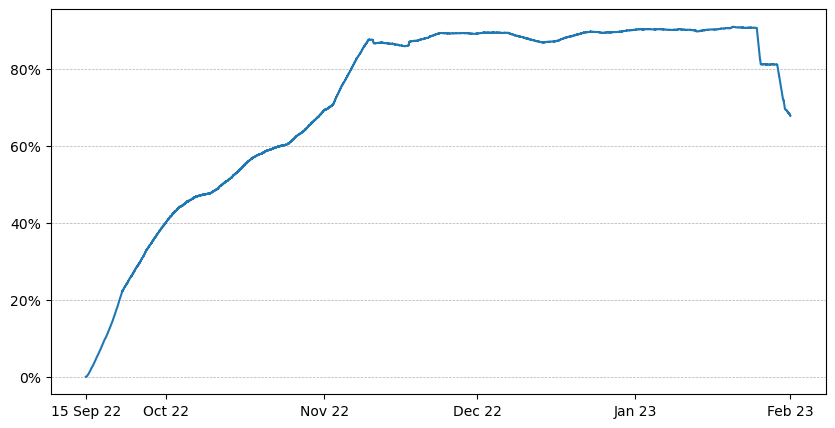

In [59]:
fig, ax = plt.subplots(figsize =(10, 5))

ax.plot(df['slot'], df['boosted'].rolling(slots_per_day*7, min_periods=1).sum()/(slots_per_day*7))

# ax.ticklabel_format(style='plain')

ax.grid(axis='y', linestyle='--', linewidth=.5)

s = df['slot'].iloc[0]
o = df[df['date'] >= '2022-10-01 00:00:00']['slot'].values[0]
n = df[df['date'] >= '2022-11-01 00:00:00']['slot'].values[0]
d = df[df['date'] >= '2022-12-01 00:00:00']['slot'].values[0]
j = df[df['date'] >= '2023-01-01 00:00:00']['slot'].values[0]
f = df['slot'].iloc[-1]


plt.xticks([s, o, n, d, j, f], ['15 Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23'])
       
left, right = plt.xlim()
ax.set_xlim(left+1, right-0)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig(f'figures/mev_boost.png')

plt.show()

In [60]:
bins = np.arange(df['slot'].min(), df['slot'].max(), slots_per_day)
data = []
for i in range(0, len(bins)-1):
        data.append(df[(df['slot'] >= bins[i]) & (df['slot'] < bins[i+1])]['block_reward'].mean())

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/117954857.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])


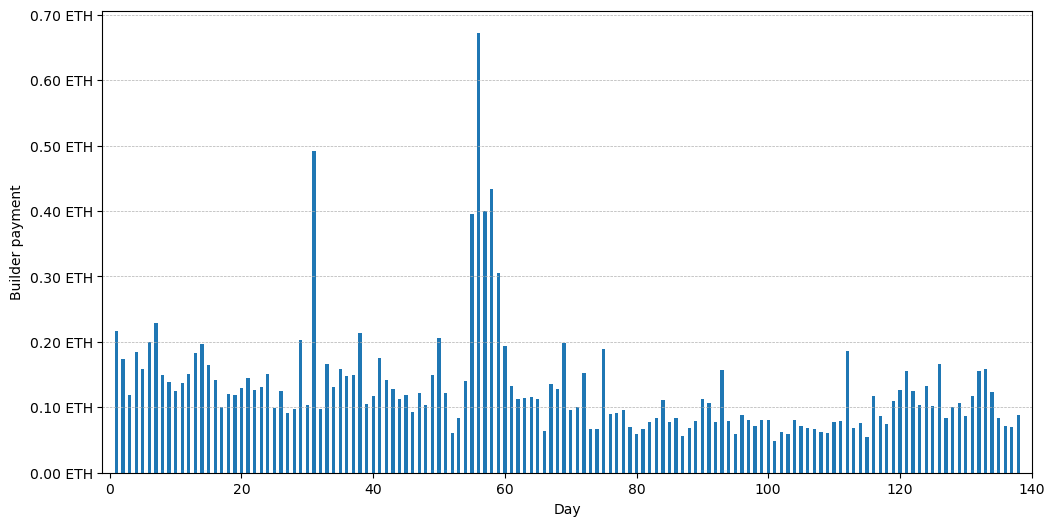

In [61]:
fig, ax = plt.subplots(figsize =(12, 6))

ax.bar(np.arange(1,len(data)+1), data, width = 0.5)
ax.grid(axis='y', linestyle='--', linewidth=.5)

left, right = plt.xlim()
ax.set_xlim(left+5, right-5)

ax.set_ylabel('Builder payment')
ax.set_xlabel('Day')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])

# show plot
plt.show()

ToDo add percentage; trend line; rate of increase..

### plotting analysis

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/2811811310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc.dropna(subset=['block_reward'], inplace=True)
/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/2811811310.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])


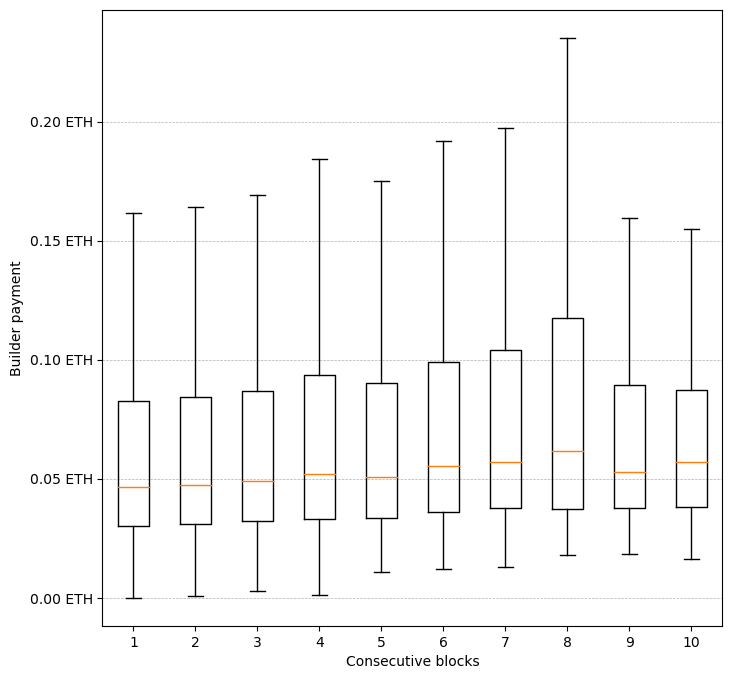

In [63]:


slc = df[df['count'] <= 10]
slc.dropna(subset=['block_reward'], inplace=True)

temp = slc['count'].unique()
temp.sort()

data = []
for x in temp:
    data.append(list(slc[slc['count']==x]['block_reward']))

fig, ax = plt.subplots(figsize =(8, 8))

ax.boxplot(data, showfliers=False)
ax.grid(axis='y', linestyle='--', linewidth=.5)

ax.set_ylabel('Builder payment')
ax.set_xlabel('Consecutive blocks')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])

plt.xticks(temp)

plt.savefig(f'figures/payment_entity.png')
plt.show()


/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/3124406037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc.dropna(subset=['block_reward'], inplace=True)
/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/3124406037.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])


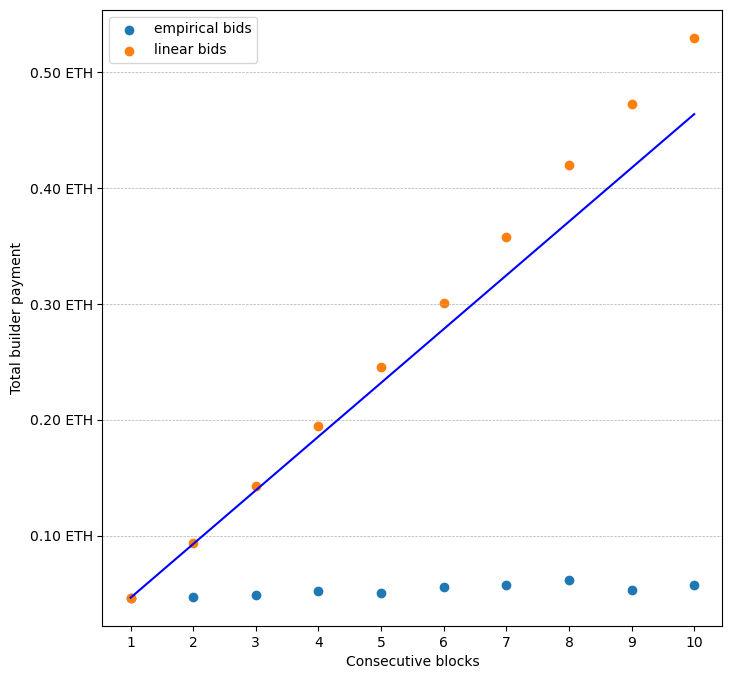

In [93]:


slc = df[df['count'] <= 10]
slc.dropna(subset=['block_reward'], inplace=True)

temp = slc['count'].unique()
temp.sort()

data = []
for x in temp:
    data.append(list(slc[slc['count']==x]['block_reward']))

fig, ax = plt.subplots(figsize =(8, 8))


ax.scatter(temp, slc['block_reward'].groupby(slc['count']).median())

#cumsum
ax.scatter(temp, slc['block_reward'].groupby(slc['count']).median().cumsum())
ax.plot([1, 10], [list(slc['block_reward'].groupby(slc['count']).median())[0], list(slc['block_reward'].groupby(slc['count']).median())[0]*len(list(slc['block_reward'].groupby(slc['count']).median()))], color='blue') #x, y
ax.grid(axis='y', linestyle='--', linewidth=.5)

ax.set_ylabel('Total builder payment')
ax.set_xlabel('Consecutive blocks')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])

plt.xticks(temp)

ax.legend(['empirical bids', 'linear bids'])

plt.savefig(f'figures/payment_pubkey.png')
plt.show()


In [238]:
slc = df[df['count'] <= 10]
slc.dropna(subset=['block_reward'], inplace=True)

temp = slc['count'].unique()
temp.sort()

data = []
for x in temp:
    data.append(list(slc[slc['count']==x]['block_reward']))

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/610934767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc.dropna(subset=['block_reward'], inplace=True)


In [239]:
distance = slc['block_reward'].groupby(slc['count']).median()
distance = distance/distance[1]-1
distance = distance*100
distance = list(distance)
distance = np.round(distance, 2)
distance = [str(x) + '%' for x in distance]
distance

count
1     0.046362
2     0.047343
3     0.049108
4     0.051887
5     0.050844
6     0.055378
7     0.057038
8     0.061515
9     0.052860
10    0.057217
Name: block_reward, dtype: float64

/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/4176385214.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  axs[1].plot([1, 10], [slc[slc['count']==1].median(), slc[slc['count']==1].median()], color='blue')
/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/4176385214.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  axs[1].plot([1, 10], [slc[slc['count']==1].median(), slc[slc['count']==1].median()], color='blue')
/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_20784/4176385214.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  axs[1].plot([1, 10], [slc[slc['count']==1].me

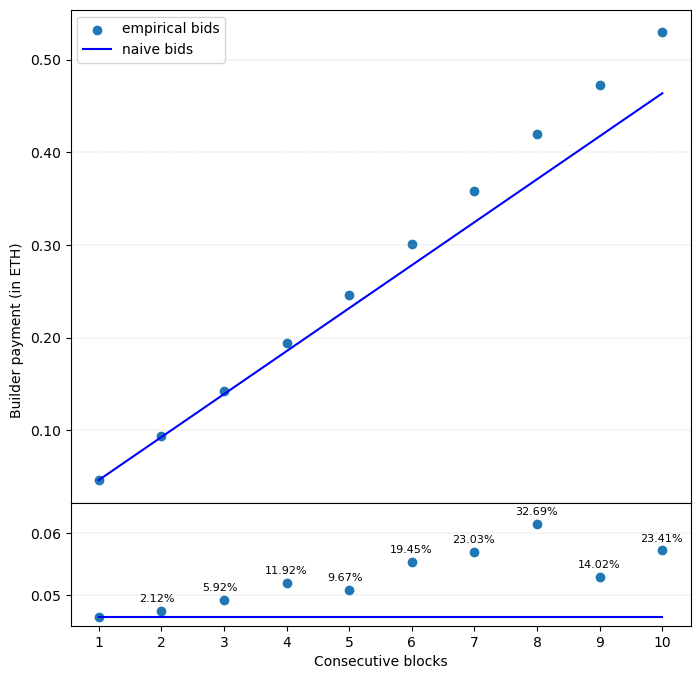

In [249]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4, 1])
axs = gs.subplots(sharex=True)

axs[0].scatter(temp, slc['block_reward'].groupby(slc['count']).median().cumsum())
axs[0].plot([1, 10], [list(slc['block_reward'].groupby(slc['count']).median())[0], list(slc['block_reward'].groupby(slc['count']).median())[0]*len(list(slc['block_reward'].groupby(slc['count']).median()))], color='blue')
axs[0].grid(axis='y', linestyle='--', linewidth=.25)


axs[1].scatter(temp, slc['block_reward'].groupby(slc['count']).median())
axs[1].set_ylim(0.045, 0.065)
axs[1].plot([1, 10], [slc[slc['count']==1].median(), slc[slc['count']==1].median()], color='blue')
axs[1].grid(axis='y', linestyle='--', linewidth=.25)

for i in range(1,len(temp)):
    axs[1].text(temp[i]-.35, list(slc['block_reward'].groupby(slc['count']).median())[i]+.0015, s=f'{distance[i]}', fontdict=dict(fontsize=8))

axs[0].legend(['empirical bids', 'naive bids'])

axs[0].set_ylabel('Builder payment (in ETH)')
axs[0].yaxis.set_label_coords(-0.075, .35)
plt.xlabel('Consecutive blocks')
vals = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.2f}'.format(x) for x in vals])
vals = axs[1].get_yticks()
axs[1].set_yticklabels(['{:,.2f}'.format(x) for x in vals])
plt.xticks(temp)

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
    
plt.savefig(f'figures/payment_entity.png')
plt.show()

In [ ]:
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

In [ ]:
#exclude without significant data
lst = df[df['count'] >= 9].index

df.drop(lst, inplace=True)

In [ ]:
#how much do builder pay on average for consecutive blocks

#add cumulative payment

slc = df[df['count'] <= 10]


fig, ax = plt.subplots(figsize =(8, 8))

x = list(slc['position'].unique())

ax.plot(x, slc['block_reward'].groupby(slc['position']).median())
ax.grid(axis='y', linestyle='--', linewidth=.5)


y1 = slc.groupby(['position']).agg({'block_reward': [q25]})
y2 = slc.groupby(['position']).agg({'block_reward': [q75]})
ax.plot(x, y1, x, y2, color='grey', linewidth=.5)

ax.fill_between(x, list(y1.iloc[:, 0]), list(y2.iloc[:, 0]), facecolor='lightgrey', alpha=.75)


#data = slc[df['count'] >= 2]
#ax.scatter(data['position'], data['block_reward'], s = .05, alpha = .75)

ax.set_ylabel('Builder payment')
ax.set_xlabel('n position in consecutive blocks')

plt.ylim(0, .15)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2f}'.format(x)+' ETH' for x in vals])

plt.xticks(list(slc['position'].unique()))

plt.savefig(f'figures/payment_position_pubkey.png')

plt.show()


In [ ]:
df

In [ ]:
#how much do builder pay on average for consecutive blocks

#add cumulative payment

slc = df[(df['count'] <11) & (df['count'] >= 5)]

fig, ax = plt.subplots(figsize =(8, 8))

ax.scatter(slc['slot'], slc['count'], s=.25)

ax.set_ylabel('consecutive blocks')
ax.set_xlabel('date')

s = df['slot'].iloc[0]
o = df[df['date'] >= '2022-10-01 00:00:00']['slot'].values[0]
n = df[df['date'] >= '2022-11-01 00:00:00']['slot'].values[0]
d = df[df['date'] >= '2022-12-01 00:00:00']['slot'].values[0]
j = df[df['date'] >= '2023-01-01 00:00:00']['slot'].values[0]
f = df['slot'].iloc[-1]+1e5


plt.xticks([s, o, n, d, j, f], ['15 Sep 22', 'Oct 22', 'Nov 22', 'Dec 22', 'Jan 23', 'Feb 23'])
       


plt.savefig(f'figures/scatter_slots.png')

plt.show()


In [ ]:
stat

In [ ]:
stat = df.groupby(df['count']).size().values



In [ ]:
slc = df[(df['count'] >= 2) & (df['count'] <= 10)]

temp = slc['count'].unique()
temp.sort()

stat = slc.groupby(slc['count']).size().values

for i, x in enumerate(temp):
    stat[i] = stat[i]/x

fig, ax = plt.subplots(figsize =(12, 6))

ax.bar(temp, stat, width = 0.5)
ax.grid(axis='y', linestyle='--', linewidth=.5)


for i in range(0,len(temp)):
    plt.text(temp[i]-.15, stat[i]+1e3, s=f'{stat[i]}', fontdict=dict(fontsize=8))
    print(temp[i], stat[i])


ax.set_ylabel('occurences')
ax.set_xlabel('consecutive blocks')

plt.xticks(temp)

plt.savefig(f'figures/occurences.png')
# show plot
plt.show()

In [ ]:
# Is there a pattern, to propose low gas blocks?
# "VALIDATOR for slot k+1 is buying the slot in order to submit an empty block just before the slot they are elected for"
# > Validators could be "unknown"

n, bins, patches = plt.hist(df[df['boosted']==True]['gas_used'], 50, density=True, facecolor='g', alpha=0.75)

temp = df[(df['boosted']==True) & (df['gas_used'] < 0.75e7)]

In [ ]:
temp

In [ ]:
print(temp.groupby(['builder_name']).size())

In [ ]:
pd.set_option("display.max_rows", None)
temp.groupby(['builder_name', 'count', 'position']).size().to_frame(name='vals')

In [ ]:
example: big shift in coingecko price, k=2

### math

In [ ]:
n = 3
k = 1
p = .5


In [ ]:
n = 3
k = 1
p = .5
1*(n-k+1)*(p**k)-2*((n-(k+1)+1)*(p**(k+1))-2*(n-(k+2)+1)*(p**(k+2)))-3*(n-(k+2)+1)*(p**(k+2))

In [ ]:
n = 3
k = 2
p = .5
(n-k+1)*(p**k)-2*(n-(k+1)+1)*(p**(k+1))

In [ ]:
-2*(n-(k+1)+1)*(p**(k+1))-2*(n-(k+2)+1)*(p**(k+2))

In [ ]:
n = 3
k = 3
p = .5
(n-k+1)*(p**k)

In [ ]:
write down cases n<k n=k n>k and if k = 0
Bernouli (1 or 2)

p = .5
n = 3
k = 2

HHH  no !
HHT  yes
HTH  no
THH  yes
HTT  no
THT  no
TTH  no
TTT  yes
-> 2/8

In [ ]:
from IPython.display import display, Math, Latex
display(Math(r'p^{k}*(1-p)^{2}*(n-k-1)+2*p^{k}*(1-p)'))

In [ ]:
#What is the expected of exactly k consecutive heads in n tosses?

p = 50/100 #probability
n = 3 #tosses
k = 0 #k consecutive tosses


print('gesamt', p**k*(1-p)**2*(n-k-1)+2*p**k*(1-p))

print('term a', p**k*(1-p)**2*(n-k-1))
print('term b', 2*p**k*(1-p))

print('equation', f'{p}**{k}*(1-{p})**2*{(n-k-1)}+2*{p}**{k}*(1-{p})')

In [ ]:
display(Math(r'p^{k}*(1-p)^{2}*max(0,(n-k-1))+2*p^{k}*(1-p)'))

In [ ]:
#What is the probability of exactly k consecutive heads in n tosses?

p = 99/100 #probability
n = 3 #tosses
k = 1 #k consecutive tosses


print('gesamt', p**k*(1-p)**2*max(0,(n-k-1))+2*p**k*(1-p))

print('term a', p**k*(1-p)**2*max(0,(n-k-1)))
print('term b', p**k*(1-p)*2)

print('equation', f'{p}**{k}*(1-{p})**2*{max(0, n-k-1)}+2*{p}**{k}*(1-{p})')

In [ ]:
p = .99
n = 3

In [ ]:
# HHH

k = 3
a = p**k
a

In [ ]:
## HHT
## THH

k = 2
b = p**k*(1-p)**2*(n-k-1)+2*p**k*(1-p)
b

In [ ]:
# HTT
# THT
# TTH

# HTH 

k = 1
c = p**k*(1-p)**2*(n-k-1)+2*p**k*(1-p)
c

In [ ]:
# TTT

k = 3
d = (1-p)**k
d

In [ ]:
a+b+c

In [ ]:
##do u need 0 blocks?


In [ ]:
n = 3
k = 2
(n-k+1)/(2**k)-(n-k)/(2**(k+1))*2

In [ ]:
n = 3
k = 3
(n-k+1)/(2**k)

In [ ]:
def prob(c, p):
    # c = consecutive blocks
    # n = slots
    # p = share MEV boost
    
    x = symbols('x', real=True)

    c = c; n = 32; p = p

    xx = min(i for i in solve(1-x+(1-p)*p**c*x**(c+1)) if i > 1)
    qn = ((1 - p*xx) / ((c + 1 - c*xx)*(1-p))) * (1/(xx**(n+1)))
    
    return qn*100, (1-qn)*100

    

In [ ]:
calc

In [ ]:
calc[:,0:13]

In [ ]:
lst = list(df['builder_name'].unique())
expt = calc[['builder_name', 'slots', 'share']]


In [ ]:
lst

In [ ]:
expt

In [ ]:
lst

In [ ]:

temp_lst = [0,1,2,3,4,5,6,7,8,9]
temp_lst.append(temp_lst)

expt['e_1'] = temp_lst

for c in range(2,5+1):
    temp_lst = []
    
    for x in lst:
        p = float(expt[expt['builder_name'] == x]['share'].values)
        no_success, success = prob(c, p)
        temp_lst.append(int(np.round(float(success)/100*total_epochs,0)))
    
    name = f'e_{c}'
    expt[name] = temp_lst
    

In [ ]:
expt

In [ ]:
calc

In [ ]:
p = np.round(len(df[df['builder_name'] == 'beaverbuild.org'])/1500,4)

print('In a dataset of', len(df), 'blocks', int(len(df)*12/60/60), 'hours we expect ..')
for i in [1,2,3,4,5]:
    c = i
    no_success, success = prob(c, p)
    print(i, 'consecutive blocks: Probability', np.round(float(success),2), '% - Instances:', np.round(float(success)/100*47,0))

print('.. proposed by the same builder')


In [ ]:
stat = df[df['builder_name'] == 'beaverbuild.org'].groupby(['count']).size().values

print('In a dataset of', len(df), 'blocks', int(len(df)*12/60/60), 'hours we find ..')

for i, x in enumerate(np.sort(df[df['builder_name'] == 'beaverbuild.org']['count'].unique())):
    stat[i] = stat[i]/x
    
    print(stat[i], 'instances of', i+1, 'consecutive blocks')
    
print('.. proposed by the same builder')

In [ ]:
## MATRIX
cons_blocks = np.arange(2,5+1) #cons_blocks
prob = np.arange(.1,.9+.05,.05)

In [ ]:
lst = []
for p in prob:
    lst_temp = []
    lst_temp.append(x)
    for c in cons_blocks:
        no_success, success = prob(c, p)
        lst_temp.append(success)
    
    for z in range(0, len(lst_temp)):
        try: 
            lst_temp[z] = np.round(float(lst_temp[z]), 2)
        except TypeError:
            lst_temp[z] = 100
        
    lst.append(lst_temp)
        

In [ ]:
df = pd.DataFrame(lst, columns =['probability', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6', 'k=7', 'k=8', 'k=9', 'k=10'])
df = df.set_index('probability')
df

In [ ]:
print('If the market share of MEV boost is p=0.5, then we derive', (38.96/100)*225, 'k=5 consecutive blocks a day.')
print('If the market share of MEV boost is p=0.5, then we derive', (38.96/100)*6759, 'k=5 consecutive blocks a month.')
